## RF with 3 categories: No matter, NS but no Remnant, NS and a remnant

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import classyRF_final as classyRF
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
import importlib
importlib.reload(classyRF_final) 

SyntaxError: invalid syntax (<ipython-input-20-ea21cb91d16b>, line 2)

In [3]:
pathREM = "C:\\Users\\marin\\Desktop\\ML_workingGroup\\RM_dataset_NOPUBLIC\\"
pathBNS = "C:\\Users\\marin\\Desktop\\ML_workingGroup\\NS_dataset_NOPUBLIC\\"
pathClassy = "C:\\Users\\marin\\Desktop\\ML_workingGroup\\FINAL\\"

In [4]:
i_m1i=1; i_m2i=2; i_x1i=3; i_x2i=4; i_mci=5; i_qi=6; i_Ri=7; i_Ci=8; 
i_m1r=9; i_m2r=10; i_x1r=11; i_x2r=12; i_mcr=13; i_qr=15; i_Rr=16; i_Cr=17;
i_snr=18;
injected_index = [i_m1i, i_m2i, i_x1i, i_x2i, i_mci, i_qi, i_Ri, i_Ci, i_snr]
recovered_index = [i_m1r, i_m2r, i_x1r, i_x2r, i_mcr, i_qr, i_Rr, i_Cr, i_snr]
independent_injected_index = [i_m1i, i_m2i, i_x1i, i_x2i, i_snr]
independent_recovered_index = [i_m1r, i_m2r, i_x1r, i_x2r, i_snr]

### Load the data and convert to the three categories

In [5]:
RF = classyRF.ClassificationRF()
RF.load_train_dataset(pathREM, fname_x='train_REM.csv')
labelREM = RF.labels_train
RF.load_train_dataset(pathBNS, fname_x='train_NS.csv')
labelBNS = RF.labels_train
RF.labels_train = labelREM+labelBNS

RF.load_test_dataset(pathREM, fname_x='test_REM.csv')
labelREM = RF.labels_test
RF.load_test_dataset(pathBNS, fname_x='test_NS.csv')
labelBNS = RF.labels_test
RF.labels_test = labelREM+labelBNS

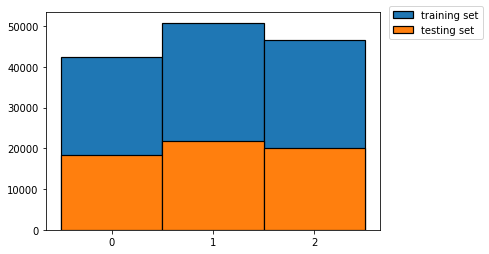

139999
Train:
label 0:  0.30376645547468195
label 1:  0.3630025928756634
label 2:  0.33323095164965466
59999
Test:
label 0:  0.30482174702911713
label 1:  0.3613060217670295
label 2:  0.3338722312038534


In [8]:
bins = np.arange(4) - 0.5
plt.hist(RF.labels_train,bins=bins,label="training set",  edgecolor='black', linewidth=1.2)
plt.hist(RF.labels_test,bins=bins, label="testing set", edgecolor='black', linewidth=1.2)
plt.xticks([0,1,2])
plt.legend(bbox_to_anchor=(1.32, 1.05))
plt.savefig("dataProportion.png",dpi=200,bbox_inches='tight')
plt.show()

N=len(RF.labels_train);print(N)
print("Train:");print("label 0: ",np.count_nonzero(RF.labels_train==0)/N);
print("label 1: ",np.count_nonzero(RF.labels_train==1)/N)
print("label 2: ",np.count_nonzero(RF.labels_train==2)/N)

N=len(RF.labels_test);print(N)
print("Test:");print("label 0: ",np.count_nonzero(RF.labels_test==0)/N);
print("label 1: ",np.count_nonzero(RF.labels_test==1)/N)
print("label 2: ",np.count_nonzero(RF.labels_test==2)/N)

# Train

In [9]:
RF.subset_features(independent_recovered_index)
optimum = RF.crossvalidation(trees=np.arange(10, 105, 5, dtype=int), info=['gini','entropy'], max_depth=np.arange(5, 30, 5, dtype=int))

Training and testing using:
m1_rec
m2_rec
chi1_rec
chi2_rec
snr
trees, depth, criteria)-> score. Time
( 10 5 gini ) -> 0.930349  Time:1.231s
( 10 10 gini ) -> 0.962166  Time:1.978s
( 10 15 gini ) -> 0.962249  Time:2.364s
( 10 20 gini ) -> 0.960833  Time:2.485s
( 10 25 gini ) -> 0.960366  Time:2.582s
( 10 5 entropy ) -> 0.923515  Time:1.728s
( 10 10 entropy ) -> 0.962783  Time:2.647s
( 10 15 entropy ) -> 0.963433  Time:3.137s
( 10 20 entropy ) -> 0.960966  Time:2.704s
( 10 25 entropy ) -> 0.961016  Time:3.812s
( 15 5 gini ) -> 0.929265  Time:1.858s
( 15 10 gini ) -> 0.962866  Time:2.699s
( 15 15 gini ) -> 0.962983  Time:3.150s
( 15 20 gini ) -> 0.962383  Time:3.213s
( 15 25 gini ) -> 0.961249  Time:3.276s
( 15 5 entropy ) -> 0.929365  Time:2.219s
( 15 10 entropy ) -> 0.962733  Time:6.266s
( 15 15 entropy ) -> 0.963999  Time:5.960s
( 15 20 entropy ) -> 0.962016  Time:6.172s
( 15 25 entropy ) -> 0.961883  Time:4.897s
( 20 5 gini ) -> 0.915765  Time:2.483s
( 20 10 gini ) -> 0.962516  Time:

In [10]:
RF.train(optimum[0], optimum[1], optimum[2])
RF.saveModel(pathClassy,'forest_final')

In [8]:
## It can also be saved as a pickle
#RF.subset_features(independent_recovered_index)
#RF.train(500, 'entropy', 'sqrt')
#import pickle
#with open('RF.pickle', 'wb') as f:
#    pickle.dump(RF.model, f)

Training and testing using:
m1_rec
m2_rec
chi1_rec
chi2_rec
snr


# Load trained model

In [6]:
#Optimum forest found:  500  trees, entropy criteria and  sqrt  max_features
RF.loadModel(pathClassy, 'forest_final')
RF.subset_features(independent_recovered_index)


loading  C:\Users\marin\Desktop\ML_workingGroup\FINAL\forest_final.joblib
Training and testing using:
m1_rec
m2_rec
chi1_rec
chi2_rec
snr


Score on testing:  0.9655327588793147
******Confusion matrix******


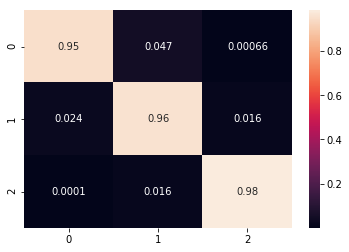

<Figure size 432x288 with 0 Axes>

In [11]:
RF.print_metrics()

## Histograms (fig5)

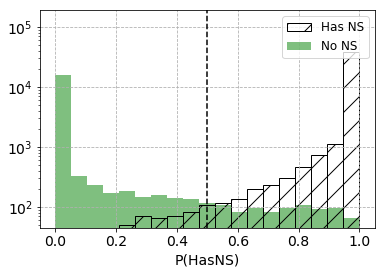

In [7]:
RF.save_plots = True
RF.hist_NS()

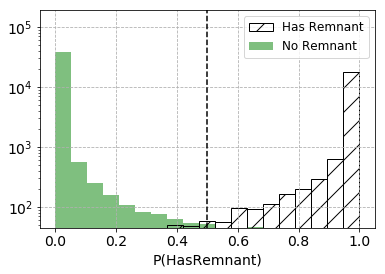

In [15]:
RF.hist_REM()

## ROC curve (fig5)

Threshold  0.1 TP: 2.128, FP 2.111
Threshold  0.3 TP: 2.044, FP 2.051
Threshold  0.5 TP: 2.001, FP 2.000
Threshold  0.8 TP: 1.929, FP 1.922


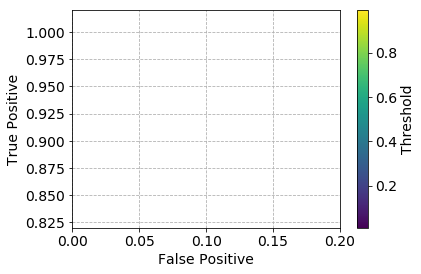

In [8]:
nsfp, nstp, nsthr = RF.ROC_NS(thr_wanted = [0.1, 0.3, 0.5, 0.8, 0.95])

Threshold  0.1 TP: 0.997, FP 0.030
Threshold  0.3 TP: 0.991, FP 0.015
Threshold  0.5 TP: 0.983, FP 0.009
Threshold  0.8 TP: 0.954, FP 0.003


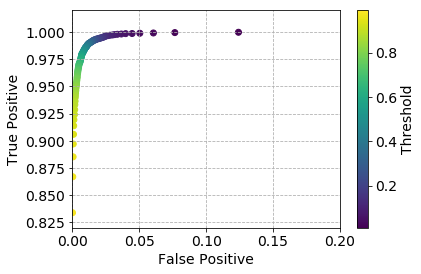

In [9]:
remfp, remtp, remthr = RF.ROC_REM(thr_wanted = [0.1, 0.3, 0.5, 0.8, 0.95])

In [10]:
with open('NS_ROC_data.txt','w') as f:
    f.write('FP\n')
    np.savetxt(f, nsfp, fmt='%f')
    f.write('TP\n')
    np.savetxt(f, nstp, fmt='%f')
    f.write('Threshold\n')
    np.savetxt(f, nsthr, fmt='%f')

In [11]:
with open('REM_ROC_data.txt','w') as f:
    f.write('FP\n')
    np.savetxt(f, remfp, fmt='%f')
    f.write('TP\n')
    np.savetxt(f, remtp, fmt='%f')
    f.write('Threshold\n')
    np.savetxt(f, remthr, fmt='%f')

## More types of score

In [5]:
pred=RF.test_prediction

In [6]:
true=RF.labels_test

In [7]:
N=len(true);
tp=0; fp=0; fn=0; tn=0;
for i in range(0,N):
    if true[i]==1:
        if pred[i]==1:
            tp=tp+1
        else:
            fn=fn+1
    else:
        if pred[i]==1:
            fp=fp+1
        else:
            tn=tn+1
tpr=tp/N; fpr=fp/N; fnr=fn/N; tnr=tn/N;            

In [8]:
print(tp,fp,fn,tn)
print(tpr,fpr,fnr,tnr)

19662 358 370 39609
0.32770546175769594 0.005966766112768546 0.0061667694461574355 0.6601610026833781


In [9]:
sensitivity=tpr/(tpr+fnr)
precision=tpr/(tpr+fpr)
f1score=2*(precision*sensitivity)/(precision+sensitivity)
print(sensitivity,precision,f1score)

0.9815295527156549 0.9821178821178822 0.9818236292819336


## Measure evaluation time

In [30]:
import time

In [36]:
event=[30,22,0.1,-0.6,11]
event=np.asarray(event)
event=event.reshape(1, -1)
times=[]
for k in range(0,23):
    t0=time.perf_counter()
    RF.model.predict(event)
    total_time=time.perf_counter()-t0
    times.append(total_time)
print("Mean time evaluating", np.mean(times), np.std(times),np.max(times),np.min(times), np.sum(times))

Mean time evaluating 0.02062150434782579 0.0025249147010092134 0.030127100000001406 0.018762899999998695 0.47429459999999324


In [35]:
events=RF.data_test[0:500]
t0=time.perf_counter()
RF.model.predict(events)
total_time=time.perf_counter()-t0
print(total_time, total_time/500)

0.08074080000000095 0.00016148160000000188


In [ ]:
t0=time.perf_counter()
RFrem.model.predict(RFrem.data_test)
total_time=time.perf_counter()-t0
print(total_time, total_time/len(RFrem.data_test))

## Line mass remnant = 0

In [37]:
outseq=np.loadtxt("outseq.d")
radius=outseq[:,0]
masses=outseq[:,2]

In [38]:
def Risco(chi1):
    z1=1+(1-chi1**2)**(1.0/3)*((1+chi1)**(1.0/3)+(1-chi1)**(1.0/3))
    z2=np.sqrt(3*chi1**2+z1**2)
    return 3+z2-np.sign(chi1)*np.sqrt((3-z1)*(3+z1+2*z2))

In [39]:
from scipy.optimize import fsolve
from scipy import interpolate

In [40]:
f = interpolate.interp1d(masses, radius,bounds_error=False, fill_value='extrapolate')
def R_km(m2):
    return f(m2)

In [41]:
alpha=0.406; beta=0.139; gamma=0.255; delta=1.761
factor=1.98847e30/(1e5*0.001)*(6.67408e-8/898755178736817640000.0)

def Mrem(m1, Risco):
    return lambda m2 : (alpha*(1-2*factor*m2/R_km(m2))/(m1/m2/(1+m1/m2)**2)**(1.0/3)-beta*Risco*factor*m2/R_km(m2)/((m1/m2/(1+m1/m2)**2))+gamma)**delta

def Mrem_check(m1,m2,Risco):
    return np.max(alpha*(1-2*factor*m2/R_km(m2))/(m1/m2/(1+m1/m2)**2)**(1.0/3)-beta*Risco*factor*m2/R_km(m2)/((m1/m2/(1+m1/m2)**2))+gamma,0)**delta

In [42]:
def calculate_red_line(chi1):
    m1_values=np.linspace(2.84,50,100); m2_values=[]
    for m1 in m1_values:
        m2_values.append(fsolve(Mrem(m1,Risco(chi1)), np.min(masses)))
        #m2_values.append((least_squares(Mrem(m1,Risco(chi1)), 1.2, bounds = (np.min(masses), np.max(masses)))).x[0])
    return [m1_values.tolist(), m2_values]

## Parameter sweep (fig4, fig6)

In [52]:
def generateMasses_limited(N):
    maxm1=50
    minm1=1
    maxm2=15
    minm2=1
    m1=np.linspace(start=minm1, stop=maxm1, num=N)
    m2=np.linspace(start=minm2, stop=maxm2, num=N)
    events=[]
    for i in range(0,N):
        for j in range(0,N):
            if(m1[i]>m2[j]):
                events.append([m1[i],m2[j]])
    return events

def probLabelDensePlot(algo, masses, chi1, chi2, snr, label, figname="sweep"):
    N=len(masses)    
    Nfigures=len(chi1)
    
    f, (ax) = plt.subplots(Nfigures,1,figsize=(10, 3*Nfigures),constrained_layout=True)
    for i in range (0,Nfigures):
        X=[]
        m1=np.zeros(N)
        m2=np.zeros(N)
        for k in range(0,N):
            X.append([masses[k][0],masses[k][1],chi1[i],chi2[i],snr[i]])
            m1[k]=masses[k][0]
            m2[k]=masses[k][1]
        proba_dense   = algo.model.predict_proba(X)
        
        ax[i].tick_params(axis='y',labelsize=13)
        ax[i].tick_params(axis='x',labelsize=13)        
        
        if label == 'NS':
            proba_dense1d = proba_dense[:,1]+proba_dense[:,2]
            sc=ax[i].scatter(m1,m2, c=proba_dense1d, vmin=0, vmax=1, s=40, cmap='viridis')
            ax[i].set_yticks([1.0,3.0,10.0])
            ax[i].set_xticks([10.0,30.0,50.0])
            ax[i].axhline(y = 3, color = 'r', linestyle = '-')

        if label == 'REM':
            proba_dense1d = proba_dense[:,2]
            ax[i].set_xticks([2.83,10.0,30.0,50.0])
            ax[i].set_yticks([1.0,2.83,10.0])
            sc=ax[i].scatter(m1,m2, c=proba_dense1d, vmin=0, vmax=1, s=40, cmap='viridis')
            redline=calculate_red_line(chi1[i])
            redline[1].insert(0,2.83)
            redline[1].insert(0,2.83)
            redline[0].insert(0,2.83)
            redline[0].insert(0,1)
            ax[i].plot(redline[0],redline[1], color = 'r', linestyle = '-')
            
        ax[i].set_title(r'$\chi^z_1$ = '+str(chi1[i])+', $\chi^z_2$ = '+str(chi2[i])+', SNR='+str(snr[i]),fontsize=18)
        if i==Nfigures-1:
            ax[i].set_xlabel(r"$m_1[M_\odot]$", fontsize=18)
        ax[i].set_xlim([1,50])
        ax[i].set_ylim([1,15])
        ax[i].set_ylabel(r"$m_2[M_\odot]$", fontsize=18)
    
    f.colorbar(sc, ax=ax, shrink=0.8)
    
    
    if algo.save_plots:
        plt.savefig(figname+".png",dpi=200,bbox_inches='tight')
    if algo.show_plots:
        plt.show()
    return

In [64]:
M=generateMasses_limited(1000);

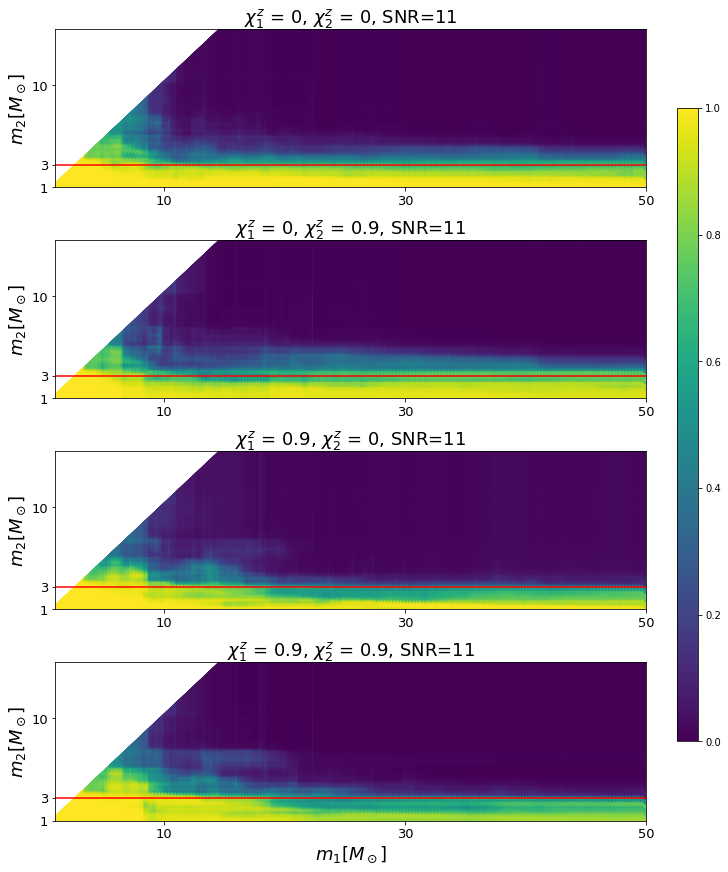

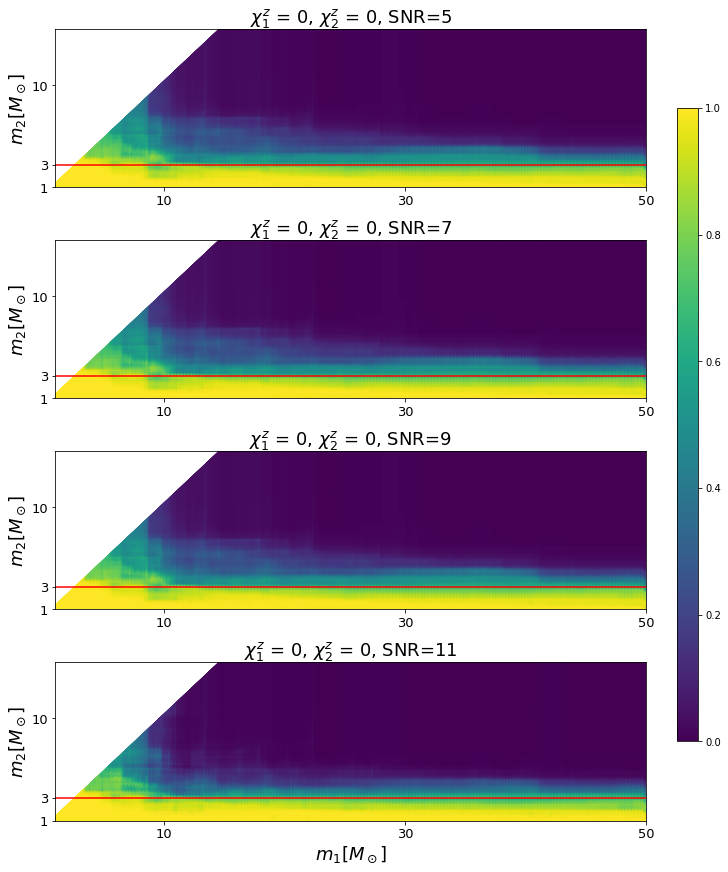

In [65]:
RF.save_plots=True
probLabelDensePlot(RF,M,[0,0,0.9,0.9],[0,0.9,0,0.9],[11,11,11,11],'NS',"3cat_fig4bns")
probLabelDensePlot(RF,M,[0,0,0,0],[0,0,0,0],[5,7,9,11],'NS',"3cat_fig6bns")
RF.save_plots=False

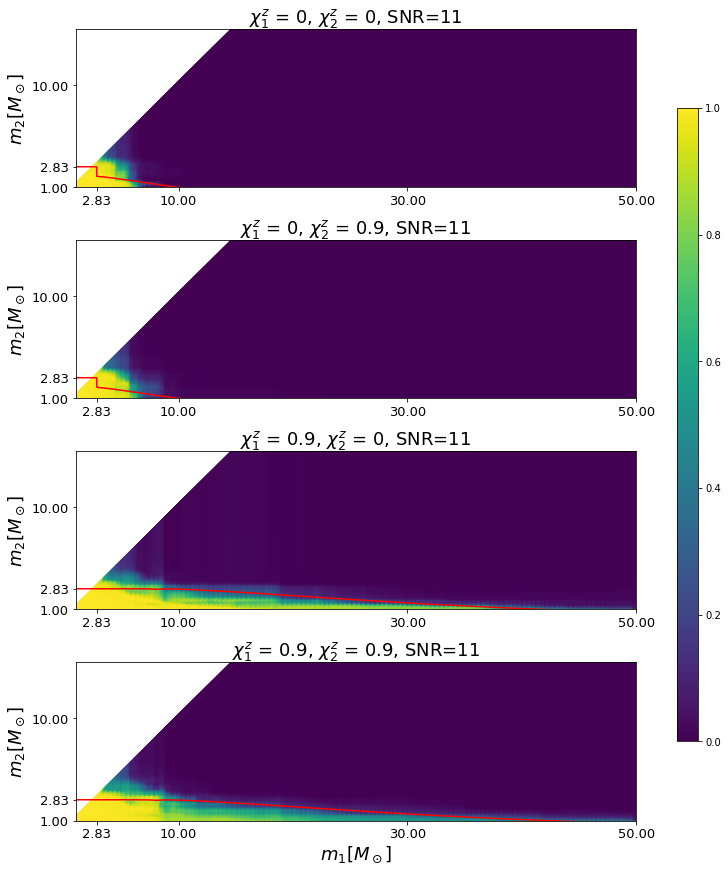

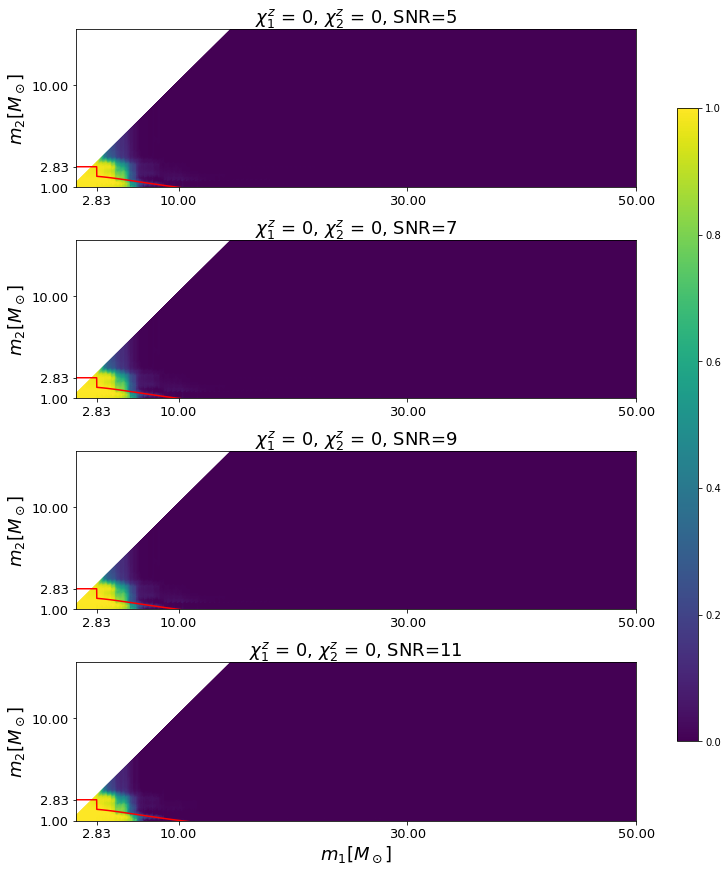

In [66]:
RF.save_plots=True
probLabelDensePlot(RF,M,[0,0,0.9,0.9],[0,0.9,0,0.9],[11,11,11,11],'REM',"3cat_fig4rem")
probLabelDensePlot(RF,M,[0,0,0,0],[0,0,0,0],[5,7,9,11],'REM',"3cat_fig6rem")
RF.save_plots=False